# On Airbnb listings - Seattle and Boston

We are going to be using the Airbnb data available in Kaggle for Seattle a Boston listings (https://www.kaggle.com/airbnb/seattle, https://www.kaggle.com/airbnb/boston ) for analysis, as seen on the source we have available three datasets for each city, so we are going to begin with exploring each source for Seattle and indentify the necesary transformations to work with them.

Datasets available:

1. calendar - including listing id and the price and availability for that day.
2. listings - including full descriptions and average review score.
3. reviews - including unique id for each reviewer and detailed comments.

## Questions of interest

1. When are the busiest times of each city? Do they match?
2. Can we predict the price based on property info?
3. Is there a main characteristic in poorly reviewed listings?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [2]:
cal_seattle = pd.read_csv('Seattle/calendar.csv')
cal_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Seems pretty straight forward info.

In [3]:
cal_seattle.shape

(1393570, 4)

In [4]:
cal_seattle.date = pd.to_datetime(cal_seattle.date)

In [5]:
print("Number of unique days in the calendar dataset: {}".format(len(cal_seattle.date.unique())))
print("Start date of the calendar: {}".format(min(cal_seattle.date.dt.strftime('%Y-%m-%d'))))
print("End date of the calendar: {}".format(max(cal_seattle.date.dt.strftime('%Y-%m-%d'))))
print("Range of the dates: {}".format(max(cal_seattle.date)-min(cal_seattle.date)))
print("Number of unique listing ids: {}".format(len(cal_seattle.listing_id.unique())))


Number of unique days in the calendar dataset: 365
Start date of the calendar: 2016-01-04
End date of the calendar: 2017-01-02
Range of the dates: 364 days 00:00:00
Number of unique listing ids: 3818


In [6]:
365*3818

1393570

Seems there is almost full 2016s info about availability and prices.

In [7]:
list_seattle = pd.read_csv('Seattle/listings.csv')
pd.set_option('display.max_columns', 92)
list_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [8]:
list_seattle.shape

(3818, 92)

In [10]:
pd.set_option('display.max_rows', 92)
list_seattle.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

We are going to begin by eliminating urls and ids not relevant for the analysis.

In [11]:
drop_cols =['listing_url',
            'scrape_id',
            'last_scraped',
            'name',
            'thumbnail_url',
            'medium_url',
            'picture_url',
            'xl_picture_url',
            'host_id',
            'host_url',
            'host_picture_url']
list_seattle.drop(labels = drop_cols, axis = 1, inplace = True)
list_seattle.shape

(3818, 81)

Now lets procede to drop the columns that only contain one value because we get no information from those, We have to be mindful when working with both Seattle and Boston datasets the single value city or one equivalent should be kept to diferentiate the origin of the data if the dataframes are merged.

In [12]:
for col in list(list_seattle.columns):
    if len(list_seattle[col].unique())== 1:
        print("{} -  {}".format(col, list(list_seattle[col].unique())[0]))

experiences_offered -  none
market -  Seattle
country_code -  US
country -  United States
has_availability -  t
calendar_last_scraped -  2016-01-04
requires_license -  f
license -  nan
jurisdiction_names -  WASHINGTON


We are keeping the column `market` to identify the origin when We merge data from both Seattle and Boston.

In [13]:
sgl_vl_cols = ['experiences_offered',
               'country_code',
               'country',
               'has_availability',
               'calendar_last_scraped',
               'requires_license',
               'license',
               'jurisdiction_names']
list_seattle.drop(labels = sgl_vl_cols, axis = 1, inplace = True)
list_seattle.shape

(3818, 73)

## When are the busiest times of each city? Do they match?

Lets see how are we able to identify when a listing is taken.

In [144]:
cal_seattle = pd.read_csv('Seattle/calendar.csv')
cal_seattle.date = pd.to_datetime(cal_seattle.date)

In [145]:
cal_seattle.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [146]:
cal_seattle.price = cal_seattle.price.str.replace('$','')
cal_seattle.price = cal_seattle.price.str.replace(',','').astype(float)

C:\Users\lccrurod\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [147]:
cal_seattle['year'] = cal_seattle['date'].dt.year
cal_seattle['month'] = cal_seattle['date'].dt.month

In [148]:
cal_seattle['is_available'] = np.where(cal_seattle.available =='f', 1,0)

In [149]:
cal_seattle.head()

,listing_id,date,available,price,year,month,is_available
0,241032,2016-01-04,t,85.0,2016,1,0
1,241032,2016-01-05,t,85.0,2016,1,0
2,241032,2016-01-06,f,NaN,2016,1,1
3,241032,2016-01-07,f,NaN,2016,1,1
4,241032,2016-01-08,f,NaN,2016,1,1


In [153]:
avail_seattle = cal_seattle[['is_available','listing_id','month']].groupby(['listing_id','month']).sum().reset_index()
avail_seattle.head()

,listing_id,month,is_available
0,3335,1,28
1,3335,2,28
2,3335,3,0
3,3335,4,0
4,3335,5,0


In [154]:
avail_seattle = pd.pivot_table(cal_seattle, values = 'is_available', index = 'listing_id', columns = 'month', aggfunc=np.sum).reset_index()
avail_seattle.head()

month,listing_id,1,2,3,4,5,6,7,8,9,10,11,12
0,3335,28,28,0,0,0,0,0,0,0,0,0,0
1,4291,0,0,0,0,0,0,0,0,0,0,0,0
2,5682,19,6,20,5,6,0,0,0,0,0,0,0
3,6606,0,0,0,0,0,0,0,0,0,0,0,0
4,7369,27,11,0,29,31,30,31,31,30,31,30,31


Lets repeat this process for Boston data.

In [164]:
cal_boston = pd.read_csv('Boston/calendar.csv')
cal_boston.date = pd.to_datetime(cal_boston.date)

cal_boston['year'] = cal_boston['date'].dt.year
cal_boston['month'] = cal_boston['date'].dt.month

cal_boston.price = cal_boston.price.str.replace('$','')
cal_boston.price = cal_boston.price.str.replace(',','').astype(float)

cal_boston['is_available'] = np.where(cal_boston.available =='f', 1,0)

avail_boston = cal_boston[['is_available','listing_id','month']].groupby(['listing_id','month']).sum().reset_index()
avail_boston = pd.pivot_table(cal_boston, values = 'is_available', index = 'listing_id', columns = 'month', aggfunc=np.sum).reset_index()


C:\Users\lccrurod\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  import sys


In [172]:
avail_df.columns

Index(['Seattle', 'Boston'], dtype='object')

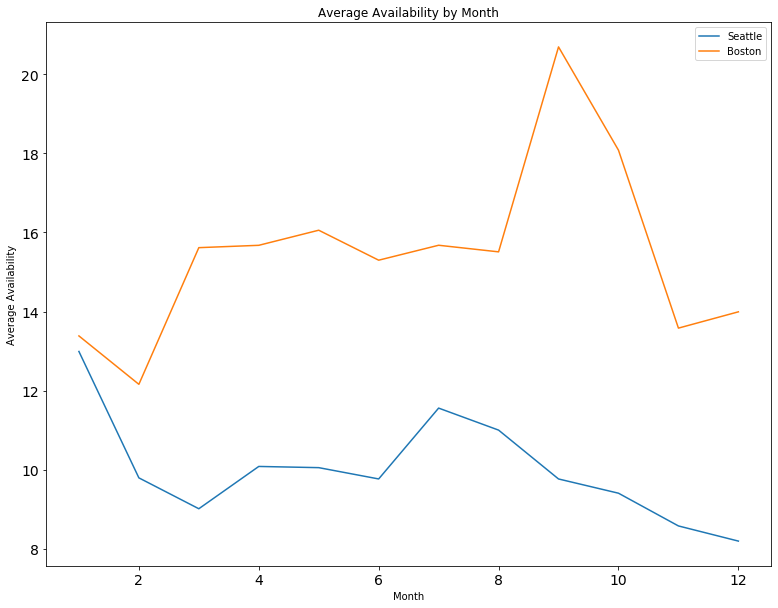

In [175]:
avail_df = pd.concat([avail_seattle.mean()[[x for x in range(1,13)]],
                      avail_boston.mean()[[x for x in range(1,13)]]],
                      axis = 1).rename(columns = {0:'Seattle', 1:'Boston'})

avail_df.plot(kind = 'line',
              xlabel = 'Month',
              ylabel = 'Average Availability',
              title = 'Average Availability by Month',
              figsize = (13,10),
              fontsize = 14);

We can identify the months that has the lowets availability city, for **Seattle** we see a clear decay in availability in the last semester of the year, reaching it's lowest by **December**, Whereas for **Boston**, which has an overall higher availability than Seattle, reaches it's lowest average availability by **February**. 

## Can we predict the price based on property info?

Let's start by defining which price are We going to attempt to predict, We could try predict maybe price for month or dayly based on listing features and zone availability, for this analysis We are going to stick to predicting the hard price included in the listing data.

Now recaping the info on the listing data We have.

In [176]:
list_seattle.dtypes

id                                    int64
summary                              object
space                                object
description                          object
neighborhood_overview                object
notes                                object
transit                              object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
host_thumbnail_url                   object
host_neighbourhood                   object
host_listings_count                 float64
host_total_listings_count           float64
host_verifications                   object
host_has_profile_pic                 object
host_identity_verified               object
street                          

In [177]:
list_seattle.isnull().mean()

id                                  0.000000
summary                             0.046359
space                               0.149031
description                         0.000000
neighborhood_overview               0.270299
notes                               0.420639
transit                             0.244631
host_name                           0.000524
host_since                          0.000524
host_location                       0.002095
host_about                          0.224987
host_response_time                  0.136983
host_response_rate                  0.136983
host_acceptance_rate                0.202462
host_is_superhost                   0.000524
host_thumbnail_url                  0.000524
host_neighbourhood                  0.078575
host_listings_count                 0.000524
host_total_listings_count           0.000524
host_verifications                  0.000000
host_has_profile_pic                0.000524
host_identity_verified              0.000524
street    